<a href="https://colab.research.google.com/github/enjoyPG/2023Gifted/blob/main/students/jwoo428/20230311/%EC%9D%B4%EC%A4%80%EC%9A%B0_%ED%98%BC%EA%B3%B5%EB%A8%B8%EC%8B%A0_6_2K_%ED%8F%89%EA%B7%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#K-평균
* k-평균 군집알고리즘이 평균값을 자동으로 찾아준다.
* 이 평균값이 클러스터의 중심에 위치하기 때문에 클러스터 중심, 또는 센트로이드라고 부른다.

#핵심키워드
###k-평균
* 처음에 랜덤하게 클러스터 중심을 정하고 클러스터를 만듬.
* 클러스터의 중심을 이동하고 다시 클러스터를 만드는 방식을 반복해서 최적의 클러스터를 구하는 알고리즘
###클러스터 중심
* k-평균알고리즘이 만든 클러스터에 속한 샘플의 특성 평균값이다.
###엘보우 방법
* 최적의 클러스터 개수를 정하는 방법중 하나
* 이너셔는 클러스터 중심과 샘플 사이거리의 제곱합이다.
* 클러스터개수에 따라 이너셔 감소가 꺾이는 지점이 적절한 클러스터 개수 k가 될 수 있다.

###k-평균 알고리즘의 소개
* 1.무작위로 k개의 클러스터 중심을 정합니다.
* 2.각 샘플에서 가장 가까운 클러스터 중심을 찾아 해당 클러스터의 샘플로 지정합니다.
* 3.클러스터에 속한 샘플의 평균값으로 클러스터 중심을 변경합니다.
* 4.클러스터 중심에 변화가 없을때까지 2번으로 돌아가 반복합니다.

###KMean 클래스

In [2]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

--2023-03-11 04:53:22--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2023-03-11 04:53:22--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2023-03-11 04:53:22--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [3]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_2d)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [4]:
print(km.labels_)

[2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


In [5]:
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([111,  98,  91]))


In [13]:
import matplotlib.pyplot as plt
def draw_fruits(arr, ratio=1):
  n = len(arr) #n은 샘플개수
  # 한줄에 10개씩 이미지 그림, 샘플 개수를 10으로 나누어서 전체 행 개수를 계산
  rows = int(np.ceil(n/10))
  # 행이 한개면 열의 개수는 샘플 개수, 그렇지 않으면 10개
  cols = n if rows < 2 else 10
  fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)
  for i in range(rows):
    for j in range(cols):
      if i*10 + j < n:
        axs[i,j].imshow(arr[i*10 +j],cmap='gray_r')
        axs[i,j].axis('off')
plt.show()

* draw_fruits() 함수는 (샘플개수, 너비, 높이)의 3차원 배열을 입력받아 가로로 10개씩 이미지를 출력한다.
* 샘플 개수에 따라 행과 열의 개수를 계산하고 figsize를 지정한다.
* figsize는 ratio매개변수에 비례하여 커짐.
* km.labels_ == 0과 같이 쓰면 km.labels_배열에서 값이 0인 위치는 True, 그 외는 모두 False가 됨
* 넘파이는 이런 불리언 배열을 사용해 원소를 선택할 수 있음
* 이를 불리언 인덱싱이라고 했음

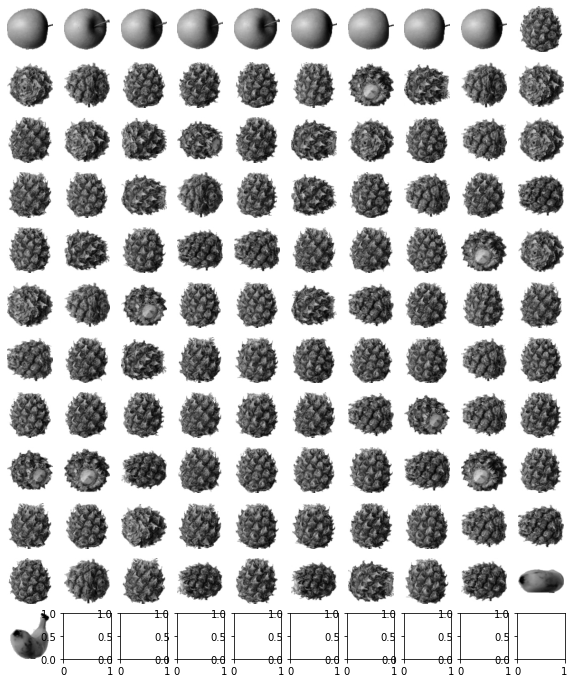

In [14]:
draw_fruits(fruits[km.labels_==0])

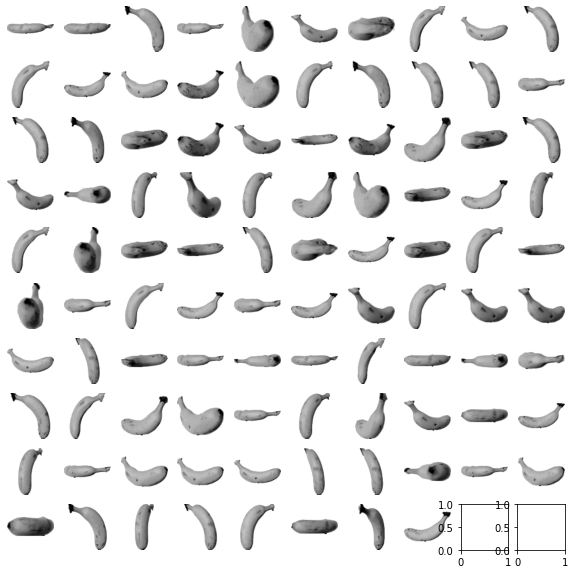

In [15]:
draw_fruits(fruits[km.labels_==1])

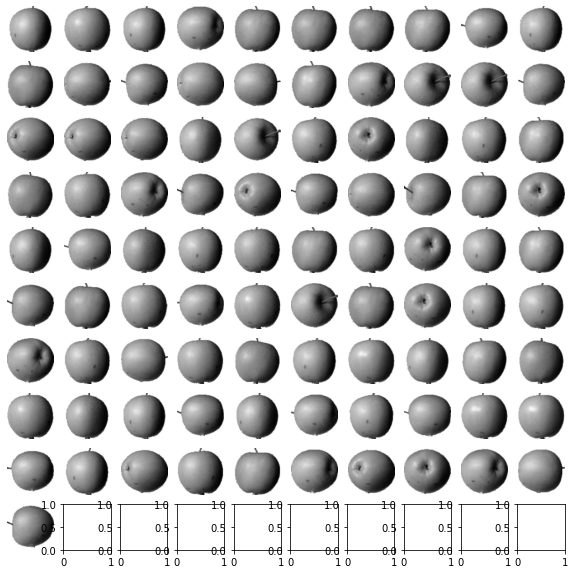

In [16]:
draw_fruits(fruits[km.labels_==2])

##클러스터 중심
* KMeans 클래스가 최종적으로 찾은 클러스터 중심은 cluster_centsers_ 속성에 저장됨
* fruits_2d샘플의 클러스터 중심이기 때문에 각 중심을 이미지로 출력하려면 100*100크기의 2차원배열이 필요함

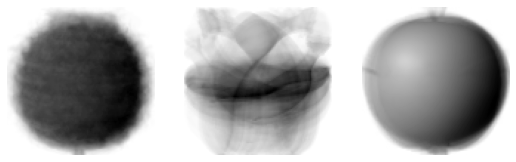

In [17]:
draw_fruits(km.cluster_centers_.reshape(-1,100,100),ratio=3)

* KMeans클래스는 훈련 데이터 샘플에서 클러스터 중심까지 거리로 변환해 주는 transform()메서드를 가지고 있음

In [18]:
print(km.transform(fruits_2d[100:101]))

[[3393.8136117  8837.37750892 5267.70439881]]


In [19]:
print(km.predict(fruits_2d[100:101]))

[0]


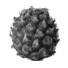

In [20]:
draw_fruits(fruits[100:101])

In [21]:
print(km.n_iter_)

4


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

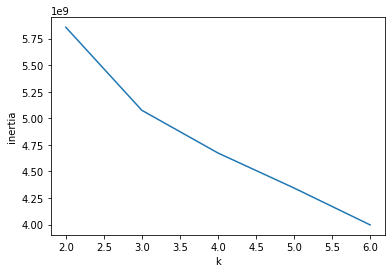

In [22]:
inertia=[]
for k in range(2,7):
  km = KMeans(n_clusters=k, random_state=42)
  km.fit(fruits_2d)
  inertia.append(km.inertia_)
plt.plot(range(2,7),inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

--2023-03-11 05:24:43--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2023-03-11 05:24:43--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2023-03-11 05:24:44--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]
(array([0, 1, 2], dtype=int32), array([111,  98,  91]))


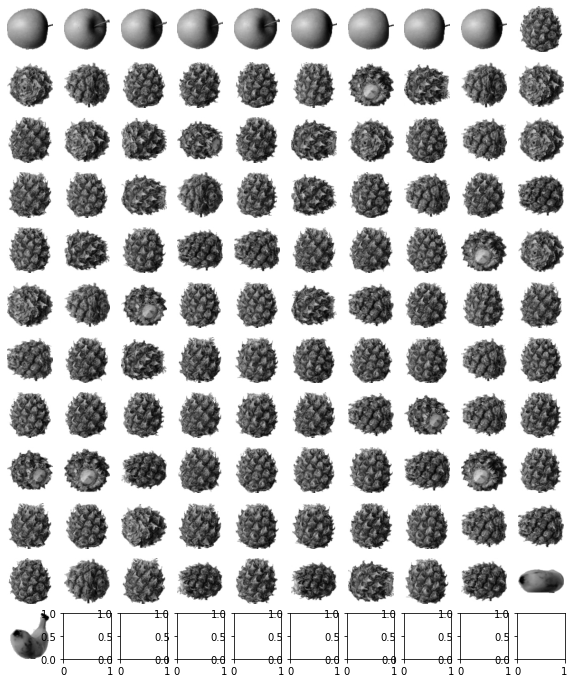

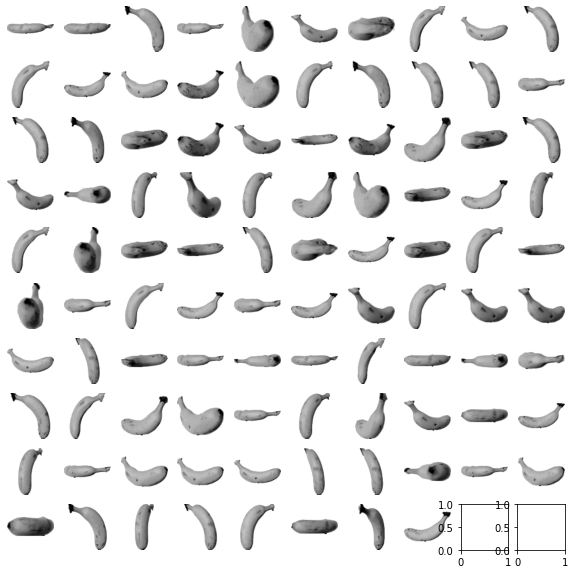

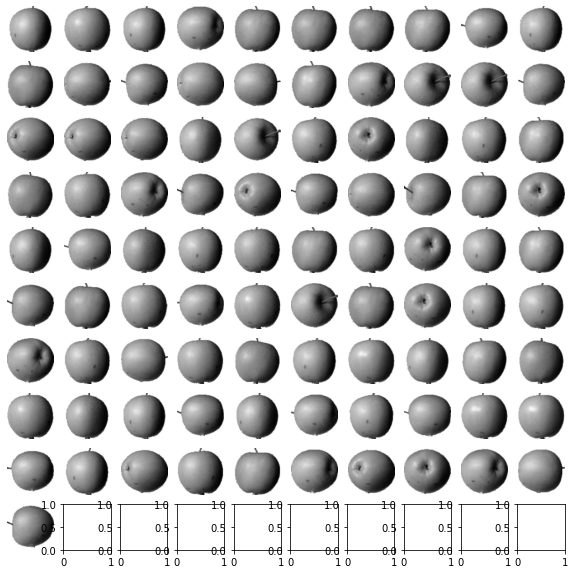

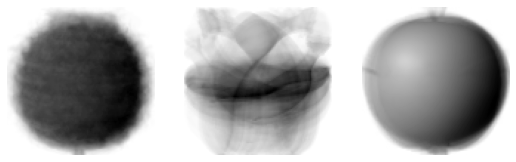

[[3393.8136117  8837.37750892 5267.70439881]]
[0]


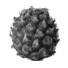

4


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

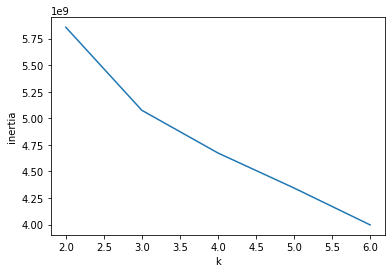

In [26]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

import numpy as np

fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1,100*100)

from sklearn.cluster import KMeans

km = KMeans(n_clusters = 3, random_state=42)
km.fit(fruits_2d)

print(km.labels_)

print(np.unique(km.labels_, return_counts=True))

import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
  n = len(arr)
  rows = int(np.ceil(n/10))
  cols = n if rows < 2 else 10
  fig , axs = plt.subplots(rows, cols, figsize=(cols*ratio,rows*ratio), squeeze=False)
  for i in range(rows):
    for j in range(cols):
      if i*10+j<n:
        axs[i,j].imshow(arr[i*10+j],cmap='gray_r')
        axs[i,j].axis('off')
  plt.show()

draw_fruits(fruits[km.labels_==0])
draw_fruits(fruits[km.labels_==1])
draw_fruits(fruits[km.labels_==2])

#cluster center

draw_fruits(km.cluster_centers_.reshape(-1,100,100),ratio=3)

print(km.transform(fruits_2d[100:101]))
print(km.predict(fruits_2d[100:101]))
draw_fruits(fruits[100:101])
print(km.n_iter_)

#최적의 k 찾기

inertia=[]
for k in range(2,7):
  km = KMeans(n_clusters=k, random_state=42)
  km.fit(fruits_2d)
  inertia.append(km.inertia_)

plt.plot(range(2,7), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()